In [2]:
import pandas as pd 
import numpy as np 

# load the dataset 
titanic = pd.read_csv('Titanic-Dataset.csv') 
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import warnings
# gnore all warnings
warnings.filterwarnings("ignore")

In [4]:
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# categorical columns 
cat_col = [col for col in titanic.columns if titanic[col].dtype == 'object'] 
print('Categorical columns :',cat_col) 
# numerical columns 
num_col = [col for col in titanic.columns if titanic[col].dtype != 'object'] 
print('Numerical columns :',num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [8]:
titanic[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [9]:
titanic = titanic.drop(columns=['Name','Ticket']) 
titanic.shape

(891, 10)

In [10]:
round((titanic.isnull().sum()/titanic.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [11]:
titanic = titanic.drop(columns='Cabin') 
titanic.dropna(subset=['Embarked'], axis=0, inplace=True) 
titanic.shape

(889, 9)

In [12]:
# mean imputation 
titanic = titanic.fillna(titanic.Age.mean()) 
# let's check the null values again 
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

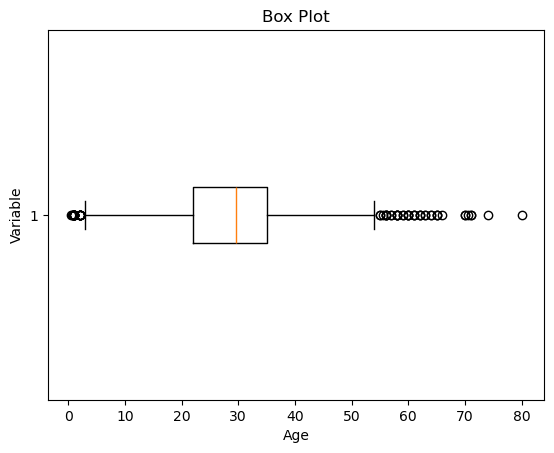

In [13]:
import matplotlib.pyplot as plt 

plt.boxplot(titanic['Age'], vert=False) 
plt.ylabel('Variable') 
plt.xlabel('Age') 
plt.title('Box Plot') 
plt.show()


In [14]:
# calculate summary statistics 
mean = titanic['Age'].mean() 
std = titanic['Age'].std() 

# calculate the lower and upper bounds 
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound) 
print('Upper Bound :',upper_bound) 

# drop the outliers 
titanic = titanic[(titanic['Age'] >= lower_bound) 
				& (titanic['Age'] <= upper_bound)]


Lower Bound : 3.705400107925648
Upper Bound : 55.578785285332785


In [15]:
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())


['male' 'female']
['S' 'C' 'Q']


In [16]:
titanic = pd.get_dummies(titanic, columns = ['Sex', 'Embarked'])
print(titanic)

     PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare  \
0              1         0       3  22.000000      1      0   7.2500   
1              2         1       1  38.000000      1      0  71.2833   
2              3         1       3  26.000000      0      0   7.9250   
3              4         1       1  35.000000      1      0  53.1000   
4              5         0       3  35.000000      0      0   8.0500   
..           ...       ...     ...        ...    ...    ...      ...   
886          887         0       2  27.000000      0      0  13.0000   
887          888         1       1  19.000000      0      0  30.0000   
888          889         0       3  29.642093      1      2  23.4500   
889          890         1       1  26.000000      0      0  30.0000   
890          891         0       3  32.000000      0      0   7.7500   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         False      True       False       False        True  
1      

In [17]:
X = titanic[['Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']] 
Y = titanic['Survived']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
from sklearn.preprocessing import StandardScaler

# init scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# init model
model = LogisticRegression(max_iter=200)

# fit model
model.fit(X_train_scaled, Y_train)


LogisticRegression(max_iter=200)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(Y_test, Y_pred))

# confusion matrix
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       102
           1       0.00      0.00      0.00        63

    accuracy                           0.62       165
   macro avg       0.31      0.50      0.38       165
weighted avg       0.38      0.62      0.47       165

[[102   0]
 [ 63   0]]


In [25]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X, Y, cv=5)
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean Cross-Validation Score: {cross_val_scores.mean():.2f}')

Cross-Validation Scores: [0.78181818 0.81707317 0.79268293 0.79878049 0.84756098]
Mean Cross-Validation Score: 0.81


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train, Y_train)

Y_pred_rf = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(Y_test, Y_pred_rf):.2f}')


Random Forest Accuracy: 0.78
